# Plot Spectrum for CIRES data 2017 Puebla Mexico earthquake

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('float_format', '{:f}'.format)
#pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True)

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)

numpy version: 1.18.4
pandas version: 1.0.4
matplotlib version: 3.2.1
seaborn version: 0.10.1


# Import data

In [2]:
# Import data for recording stations located in geotechnical zone I (firm soil)
df_CIRES_ZoneeI = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneI.csv')

In [3]:
# Import data for recording stations located in geotechnical zone II (transition zone)
df_CIRES_ZoneeII = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneII.csv')

In [4]:
# Import data for recording stations located in geotechnical zone IIIa (soft soil)
df_CIRES_ZoneeIIIa = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneIIIa.csv')

In [5]:
# Import data for recording stations located in geotechnical zone IIIb (soft soil)
df_CIRES_ZoneeIIIb = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneIIIb.csv')

In [6]:
# Import data for recording stations located in geotechnical zone IIIc (soft soil)
df_CIRES_ZoneeIIIc = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneIIIc.csv')

In [7]:
# Import data for recording stations located in geotechnical zone IIId (soft soil)
df_CIRES_ZoneeIIId = pd.read_csv('/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/CIRES Data/PseudoAcceleration_CIRES_ZoneIIId.csv')

# Location of the CIRES stations

Interactive map available at:
http://www.cires.org.mx/racm_mapa/index.php

![Map_CIRES_Stations](Figure_2_COLOR.png)

Source: Roeslin, S., Ma, Q., Juárez-Garcia, H., Gómez-Bernal, A., Wicker, J., & Wotherspoon, L. (2020). A machine learning damage prediction model for the 2017 Puebla-Morelos, Mexico earthquake. Earthquake Spectra. (accepted - to be published soon)

# Explore data

In [8]:
df_CIRES_ZoneeI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time(s)                     500 non-null    float64
 1   CE18-EQ11-psaNorthSouth(g)  498 non-null    float64
 2   CE18-EQ11-psaEastWest(g)    498 non-null    float64
 3   CS78-EQ21-psaNorthSouth(g)  498 non-null    float64
 4   CS78-EQ21-psaEastWest(g)    498 non-null    float64
 5   FJ74-EQ28-psaNorthSouth(g)  498 non-null    float64
 6   FJ74-EQ28-psaEastWest(g)    498 non-null    float64
 7   MT50-EQ41-psaNorthSouth(g)  498 non-null    float64
 8   MT50-EQ41-psaEastWest(g)    498 non-null    float64
 9   PA34-EQ45-psaNorthSouth(g)  498 non-null    float64
 10  PA34-EQ45-psaEastWest(g)    498 non-null    float64
 11  TP13-EQ55-psaNorthSouth(g)  498 non-null    float64
 12  TP13-EQ55-psaEastWest(g)    498 non-null    float64
 13  UI21-EQ57-psaNorthSouth(g)  498 non

In [9]:
df_CIRES_ZoneeI

,Time(s),CE18-EQ11-psaNorthSouth(g),CE18-EQ11-psaEastWest(g),CS78-EQ21-psaNorthSouth(g),CS78-EQ21-psaEastWest(g),FJ74-EQ28-psaNorthSouth(g),FJ74-EQ28-psaEastWest(g),MT50-EQ41-psaNorthSouth(g),MT50-EQ41-psaEastWest(g),PA34-EQ45-psaNorthSouth(g),PA34-EQ45-psaEastWest(g),TP13-EQ55-psaNorthSouth(g),TP13-EQ55-psaEastWest(g),UI21-EQ57-psaNorthSouth(g),UI21-EQ57-psaEastWest(g)
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,0.074834,0.052314,0.089296,0.057001,0.095258,0.093139,0.048134,0.059593,0.086266,0.087756,0.062080,0.069385,0.077791,0.081048
3,0.03,0.075281,0.053041,0.090935,0.057237,0.097340,0.096486,0.048151,0.059658,0.085339,0.097393,0.063492,0.068640,0.082251,0.081101
4,0.04,0.077566,0.053173,0.092764,0.058405,0.096792,0.098417,0.048110,0.059867,0.087755,0.099024,0.067097,0.069883,0.082598,0.082468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.95,0.012000,0.012430,0.013179,0.011495,0.016237,0.011871,0.009906,0.014837,0.012484,0.013005,0.015080,0.012704,0.009904,0.011911
496,4.96,0.011938,0.012304,0.013098,0.011460,0.016279,0.011746,0.009920,0.014753,0.012432,0.012905,0.015079,0.012660,0.009884,0.011853
497,4.97,0.011873,0.012177,0.013016,0.011425,0.016319,0.011619,0.009950,0.014669,0.012380,0.012801,0.015076,0.012613,0.009861,0.011793
498,4.98,0.011806,0.012052,0.012933,0.011390,0.016356,0.011492,0.009980,0.014583,0.012326,0.012695,0.015071,0.012565,0.009835,0.011731


In [10]:
df_CIRES_ZoneeII.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time(s)                     500 non-null    float64
 1   AU46-EQ6-psaNorthSouth(g)   498 non-null    float64
 2   AU46-EQ6-psaEastWest(g)     498 non-null    float64
 3   CO47-EQ18-psaNorthSouth(g)  498 non-null    float64
 4   CO47-EQ18-psaEastWest(g)    498 non-null    float64
 5   DR16-EQ24-psaNorthSouth(g)  498 non-null    float64
 6   DR16-EQ24-psaEastWest(g)    498 non-null    float64
 7   DX37-EQ25-psaNorthSouth(g)  498 non-null    float64
 8   DX37-EQ25-psaEastWest(g)    498 non-null    float64
 9   EO30-EQ26-psaNorthSouth(g)  498 non-null    float64
 10  EO30-EQ26-psaEastWest(g)    498 non-null    float64
 11  GR27-EQ31-psaNorthSouth(g)  498 non-null    float64
 12  GR27-EQ31-psaEastWest(g)    498 non-null    float64
 13  ME52-EQ39-psaNorthSouth(g)  498 non

In [11]:
df_CIRES_ZoneeII

,Time(s),AU46-EQ6-psaNorthSouth(g),AU46-EQ6-psaEastWest(g),CO47-EQ18-psaNorthSouth(g),CO47-EQ18-psaEastWest(g),DR16-EQ24-psaNorthSouth(g),DR16-EQ24-psaEastWest(g),DX37-EQ25-psaNorthSouth(g),DX37-EQ25-psaEastWest(g),EO30-EQ26-psaNorthSouth(g),EO30-EQ26-psaEastWest(g),GR27-EQ31-psaNorthSouth(g),GR27-EQ31-psaEastWest(g),ME52-EQ39-psaNorthSouth(g),ME52-EQ39-psaEastWest(g)
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,0.079306,0.097245,0.073840,0.096450,0.072451,0.078818,0.191435,0.166138,0.069315,0.084225,0.086873,0.122463,0.064290,0.073969
3,0.03,0.080057,0.098105,0.074234,0.096470,0.072921,0.078828,0.196925,0.176109,0.069737,0.084155,0.086481,0.122645,0.064711,0.074473
4,0.04,0.079236,0.098387,0.074817,0.097050,0.073306,0.079513,0.191287,0.170828,0.069640,0.085747,0.086999,0.122513,0.065241,0.074763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.95,0.014308,0.018755,0.012601,0.015279,0.010213,0.009996,0.023236,0.023493,0.011964,0.017116,0.012107,0.011811,0.010454,0.015552
496,4.96,0.014366,0.018697,0.012654,0.015220,0.010228,0.009979,0.023225,0.023444,0.011997,0.017054,0.012134,0.011763,0.010476,0.015494
497,4.97,0.014424,0.018638,0.012705,0.015161,0.010239,0.009962,0.023210,0.023395,0.012027,0.016991,0.012159,0.011715,0.010497,0.015436
498,4.98,0.014479,0.018579,0.012753,0.015102,0.010248,0.009944,0.023192,0.023345,0.012056,0.016929,0.012182,0.011667,0.010516,0.015377


In [12]:
df_CIRES_ZoneeIIIa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time(s)                     500 non-null    float64
 1   AO24-EQ3-psaNorthSouth(g)   498 non-null    float64
 2   AO24-EQ3-psaEastWest(g)     498 non-null    float64
 3   CH84-EQ14-psaNorthSouth(g)  498 non-null    float64
 4   CH84-EQ14-psaEastWest(g)    498 non-null    float64
 5   ES57-EQ27-psaNorthSouth(g)  498 non-null    float64
 6   ES57-EQ27-psaEastWest(g)    498 non-null    float64
 7   IB22-EQ33-psaNorthSouth(g)  498 non-null    float64
 8   IB22-EQ33-psaEastWest(g)    498 non-null    float64
 9   JC54-EQ35-psaNorthSouth(g)  498 non-null    float64
 10  JC54-EQ35-psaEastWest(g)    498 non-null    float64
 11  LI33-EQ36-psaNorthSouth(g)  498 non-null    float64
 12  LI33-EQ36-psaEastWest(g)    498 non-null    float64
 13  LV17-EQ38-psaNorthSouth(g)  498 non

In [13]:
df_CIRES_ZoneeIIIa

,Time(s),AO24-EQ3-psaNorthSouth(g),AO24-EQ3-psaEastWest(g),CH84-EQ14-psaNorthSouth(g),CH84-EQ14-psaEastWest(g),ES57-EQ27-psaNorthSouth(g),ES57-EQ27-psaEastWest(g),IB22-EQ33-psaNorthSouth(g),IB22-EQ33-psaEastWest(g),JC54-EQ35-psaNorthSouth(g),...,LI33-EQ36-psaNorthSouth(g),LI33-EQ36-psaEastWest(g),LV17-EQ38-psaNorthSouth(g),LV17-EQ38-psaEastWest(g),MI15-EQ40-psaNorthSouth(g),MI15-EQ40-psaEastWest(g),SI53-EQ50-psaNorthSouth(g),SI53-EQ50-psaEastWest(g),UC44-EQ56-psaNorthSouth(g),UC44-EQ56-psaEastWest(g)
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,0.108868,0.122231,0.152570,0.230782,0.072136,0.086004,0.121778,0.165080,0.225900,...,0.140923,0.222439,0.125518,0.106382,0.211270,0.171450,0.131451,0.181288,0.127922,0.127692
3,0.03,0.108762,0.122151,0.153699,0.232111,0.072099,0.086247,0.121941,0.165569,0.225806,...,0.141070,0.278007,0.125926,0.106561,0.211294,0.146320,0.131921,0.181495,0.128258,0.128339
4,0.04,0.109069,0.122454,0.155818,0.231564,0.072534,0.085933,0.122479,0.165308,0.228832,...,0.141657,0.270732,0.126567,0.106066,0.211626,0.168795,0.133782,0.181967,0.128993,0.128748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.95,0.016278,0.017452,0.023589,0.031647,0.011276,0.018812,0.024231,0.020947,0.022826,...,0.026113,0.034508,0.012561,0.016779,0.024210,0.027077,0.016821,0.017426,0.012546,0.019131
496,4.96,0.016297,0.017403,0.023546,0.031529,0.011356,0.018744,0.024223,0.020913,0.022813,...,0.025976,0.034346,0.012503,0.016676,0.024006,0.026842,0.016680,0.017388,0.012534,0.019122
497,4.97,0.016314,0.017354,0.023500,0.031408,0.011434,0.018676,0.024211,0.020880,0.022798,...,0.025839,0.034184,0.012443,0.016574,0.023798,0.026607,0.016540,0.017349,0.012521,0.019109
498,4.98,0.016327,0.017305,0.023450,0.031285,0.011509,0.018607,0.024196,0.020845,0.022781,...,0.025702,0.034021,0.012383,0.016472,0.023586,0.026371,0.016400,0.017310,0.012506,0.019094


In [14]:
df_CIRES_ZoneeIIIb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time(s)                     500 non-null    float64
 1   AL01-EQ2-psaNorthSouth(g)   498 non-null    float64
 2   AL01-EQ2-psaEastWest(g)     498 non-null    float64
 3   BL45-EQ8-psaNorthSouth(g)   498 non-null    float64
 4   BL45-EQ8-psaEastWest(g)     498 non-null    float64
 5   CI05-EQ15-psaNorthSouth(g)  498 non-null    float64
 6   CI05-EQ15-psaEastWest(g)    498 non-null    float64
 7   CJ03-EQ16-psaNorthSouth(g)  498 non-null    float64
 8   CJ03-EQ16-psaEastWest(g)    498 non-null    float64
 9   CJ04-EQ17-psaNorthSouth(g)  498 non-null    float64
 10  CJ04-EQ17-psaEastWest(g)    498 non-null    float64
 11  CO56-EQ19-psaNorthSouth(g)  498 non-null    float64
 12  CO56-EQ19-psaEastWest(g)    498 non-null    float64
 13  GA62-EQ29-psaNorthSouth(g)  498 non

In [15]:
df_CIRES_ZoneeIIIb

,Time(s),AL01-EQ2-psaNorthSouth(g),AL01-EQ2-psaEastWest(g),BL45-EQ8-psaNorthSouth(g),BL45-EQ8-psaEastWest(g),CI05-EQ15-psaNorthSouth(g),CI05-EQ15-psaEastWest(g),CJ03-EQ16-psaNorthSouth(g),CJ03-EQ16-psaEastWest(g),CJ04-EQ17-psaNorthSouth(g),...,RM48-EQ49-psaNorthSouth(g),RM48-EQ49-psaEastWest(g),SP51-EQ51-psaNorthSouth(g),SP51-EQ51-psaEastWest(g),TL08-EQ53-psaNorthSouth(g),TL08-EQ53-psaEastWest(g),TL55-EQ54-psaNorthSouth(g),TL55-EQ54-psaEastWest(g),VG09-EQ58-psaNorthSouth(g),VG09-EQ58-psaEastWest(g)
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,0.119874,0.110783,0.104508,0.116793,0.115872,0.116793,0.114356,0.100158,0.126836,...,0.062150,0.080546,0.079340,0.102504,0.084711,0.082966,0.084264,0.070648,0.121755,0.104019
3,0.03,0.119962,0.110995,0.104415,0.116854,0.115667,0.116953,0.114500,0.100347,0.126980,...,0.062753,0.080614,0.079089,0.102675,0.084694,0.083192,0.084410,0.070676,0.122423,0.104171
4,0.04,0.120809,0.111324,0.104610,0.117435,0.116254,0.117925,0.115174,0.100524,0.128113,...,0.063163,0.080639,0.079248,0.102810,0.085936,0.083027,0.084376,0.070656,0.122075,0.104296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.95,0.017112,0.026120,0.022215,0.032706,0.023238,0.021745,0.022166,0.022426,0.022080,...,0.018544,0.028756,0.021933,0.029878,0.014953,0.024732,0.013186,0.017636,0.019006,0.031731
496,4.96,0.017085,0.025953,0.022113,0.032482,0.023217,0.021564,0.022050,0.022229,0.021963,...,0.018437,0.028551,0.021913,0.029742,0.014894,0.024446,0.013108,0.017497,0.018916,0.031455
497,4.97,0.017055,0.025786,0.022012,0.032259,0.023193,0.021561,0.021933,0.022034,0.021845,...,0.018330,0.028347,0.021889,0.029602,0.014835,0.024344,0.013031,0.017358,0.018826,0.031180
498,4.98,0.017023,0.025618,0.021910,0.032036,0.023166,0.021555,0.021816,0.021839,0.021726,...,0.018221,0.028143,0.021863,0.029459,0.014775,0.024359,0.012954,0.017220,0.018736,0.030904


In [16]:
df_CIRES_ZoneeIIIc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time(s)                     500 non-null    float64
 1   AP68-EQ4-psaNorthSouth(g)   500 non-null    float64
 2   AP68-EQ4-psaEastWest(g)     500 non-null    float64
 3   BA49-EQ7-psaNorthSouth(g)   498 non-null    float64
 4   BA49-EQ7-psaEastWest(g)     498 non-null    float64
 5   BO39-EQ9-psaNorthSouth(g)   498 non-null    float64
 6   BO39-EQ9-psaEastWest(g)     498 non-null    float64
 7   CA59-EQ10-psaNorthSouth(g)  498 non-null    float64
 8   CA59-EQ10-psaEastWest(g)    498 non-null    float64
 9   CU80-EQ22-psaNorthSouth(g)  500 non-null    float64
 10  CU80-EQ22-psaEastWest(g)    500 non-null    float64
 11  HJ72-EQ32-psaNorthSouth(g)  498 non-null    float64
 12  HJ72-EQ32-psaEastWest(g)    498 non-null    float64
 13  JA43-EQ34-psaNorthSouth(g)  498 non

In [17]:
df_CIRES_ZoneeIIIc

,Time(s),AP68-EQ4-psaNorthSouth(g),AP68-EQ4-psaEastWest(g),BA49-EQ7-psaNorthSouth(g),BA49-EQ7-psaEastWest(g),BO39-EQ9-psaNorthSouth(g),BO39-EQ9-psaEastWest(g),CA59-EQ10-psaNorthSouth(g),CA59-EQ10-psaEastWest(g),CU80-EQ22-psaNorthSouth(g),...,JA43-EQ34-psaNorthSouth(g),JA43-EQ34-psaEastWest(g),MY19-EQ42-psaNorthSouth(g),MY19-EQ42-psaEastWest(g),RI76-EQ48-psaNorthSouth(g),RI76-EQ48-psaEastWest(g),VM29-EQ59-psaNorthSouth(g),VM29-EQ59-psaEastWest(g),XP06-EQ61-psaNorthSouth(g),XP06-EQ61-psaEastWest(g)
0,0.00,0.130968,0.160751,NaN,NaN,NaN,NaN,NaN,NaN,0.146858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,0.131537,0.161474,NaN,NaN,NaN,NaN,NaN,NaN,0.147083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,0.131404,0.160752,0.091043,0.115875,0.079530,0.097047,0.085212,0.091661,0.146876,...,0.084862,0.108363,0.122723,0.114382,0.053502,0.074132,0.086887,0.096931,0.083721,0.129739
3,0.03,0.131987,0.160953,0.090817,0.115325,0.079622,0.097236,0.085502,0.091710,0.146889,...,0.084752,0.108795,0.122956,0.114823,0.053420,0.074419,0.087085,0.097012,0.083501,0.110879
4,0.04,0.132459,0.161523,0.090748,0.119688,0.079822,0.098824,0.085613,0.091625,0.146889,...,0.085695,0.108807,0.123223,0.114210,0.053683,0.074225,0.087095,0.097693,0.083328,0.110160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.95,0.026301,0.044308,0.028006,0.040406,0.021428,0.042325,0.018472,0.040506,0.028119,...,0.019428,0.044078,0.028903,0.045941,0.017200,0.036577,0.027403,0.031905,0.022305,0.040219
496,4.96,0.026176,0.043988,0.027838,0.040140,0.021349,0.041932,0.018387,0.040274,0.028036,...,0.019360,0.043819,0.028538,0.045607,0.017152,0.036345,0.027298,0.031643,0.022232,0.039954
497,4.97,0.026052,0.043671,0.027660,0.039874,0.021269,0.041537,0.018302,0.040042,0.027949,...,0.019290,0.043560,0.028173,0.045274,0.017104,0.036115,0.027192,0.031382,0.022158,0.039685
498,4.98,0.025927,0.043353,0.027473,0.039611,0.021190,0.041144,0.018218,0.039810,0.027860,...,0.019219,0.043303,0.027806,0.044942,0.017055,0.035886,0.027085,0.031122,0.022084,0.039413


In [18]:
df_CIRES_ZoneeIIId.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time(s)                     500 non-null    float64
 1   AE02-EQ1-psaNorthSouth(g)   498 non-null    float64
 2   AE02-EQ1-psaEastWest(g)     498 non-null    float64
 3   AU11-EQ5-psaNorthSouth(g)   498 non-null    float64
 4   AU11-EQ5-psaEastWest(g)     498 non-null    float64
 5   CE23-EQ12-psaNorthSouth(g)  498 non-null    float64
 6   CE23-EQ12-psaEastWest(g)    498 non-null    float64
 7   CE32-EQ13-psaNorthSouth(g)  498 non-null    float64
 8   CE32-EQ13-psaEastWest(g)    498 non-null    float64
 9   CP28-EQ20-psaNorthSouth(g)  498 non-null    float64
 10  CP28-EQ20-psaEastWest(g)    498 non-null    float64
 11  DM12-EQ23-psaNorthSouth(g)  498 non-null    float64
 12  DM12-EQ23-psaEastWest(g)    498 non-null    float64
 13  NZ20-EQ43-psaNorthSouth(g)  500 non

In [19]:
df_CIRES_ZoneeIIId

,Time(s),AE02-EQ1-psaNorthSouth(g),AE02-EQ1-psaEastWest(g),AU11-EQ5-psaNorthSouth(g),AU11-EQ5-psaEastWest(g),CE23-EQ12-psaNorthSouth(g),CE23-EQ12-psaEastWest(g),CE32-EQ13-psaNorthSouth(g),CE32-EQ13-psaEastWest(g),CP28-EQ20-psaNorthSouth(g),...,NZ20-EQ43-psaNorthSouth(g),NZ20-EQ43-psaEastWest(g),NZ31-EQ44-psaNorthSouth(g),NZ31-EQ44-psaEastWest(g),PD42-EQ46-psaNorthSouth(g),PD42-EQ46-psaEastWest(g),TH35-EQ52-psaNorthSouth(g),TH35-EQ52-psaEastWest(g),XO36-EQ60-psaNorthSouth(g),XO36-EQ60-psaEastWest(g)
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.158134,0.180726,NaN,NaN,NaN,NaN,NaN,NaN,0.140336,0.242207
1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.159248,0.183759,NaN,NaN,NaN,NaN,NaN,NaN,0.140603,0.246372
2,0.02,0.099226,0.117918,0.073702,0.092154,0.053547,0.061291,0.082184,0.078700,0.092952,...,0.158428,0.187709,0.112332,0.099587,0.085613,0.098384,0.194012,0.192685,0.140356,0.248518
3,0.03,0.099772,0.118536,0.074033,0.092475,0.053568,0.061244,0.082234,0.078590,0.093644,...,0.158638,0.230559,0.112247,0.099757,0.085388,0.098871,0.193653,0.195683,0.140498,0.275355
4,0.04,0.104076,0.121176,0.074010,0.092470,0.053507,0.061151,0.082933,0.078463,0.096418,...,0.159796,0.362971,0.112335,0.099760,0.087265,0.099273,0.195679,0.192062,0.140668,0.315974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.95,0.123858,0.100999,0.037827,0.072701,0.065892,0.096524,0.055500,0.066704,0.006332,...,0.087747,0.054717,0.077376,0.119499,0.035027,0.074059,0.100054,0.109308,0.046932,0.165233
496,4.96,0.122323,0.100470,0.037659,0.071957,0.065620,0.095697,0.054567,0.066281,0.006315,...,0.087416,0.054418,0.076737,0.120578,0.034819,0.073169,0.100079,0.109119,0.046786,0.164580
497,4.97,0.120755,0.099934,0.037488,0.071215,0.065313,0.094864,0.053633,0.065857,0.006298,...,0.087086,0.054113,0.076176,0.121650,0.034608,0.072281,0.100087,0.108917,0.046625,0.163921
498,4.98,0.119158,0.099391,0.037314,0.070478,0.064969,0.094027,0.052700,0.065433,0.006279,...,0.086757,0.053805,0.075730,0.122715,0.034394,0.071399,0.100086,0.108700,0.046455,0.163257


# Plot Response Spectrum

## For an individual station

Using plotly

In [31]:
import plotly.graph_objects as go

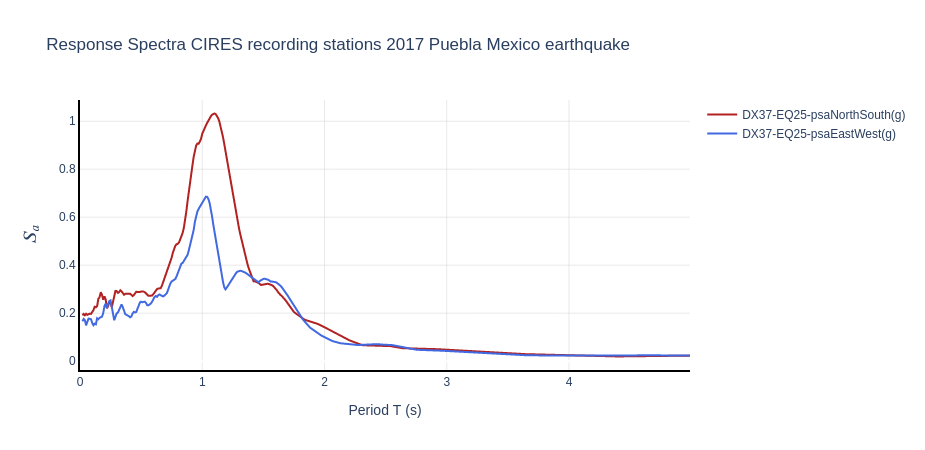

In [63]:
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_CIRES_ZoneeII['Time(s)'], y=df_CIRES_ZoneeII['DX37-EQ25-psaNorthSouth(g)'], name='DX37-EQ25-psaNorthSouth(g)',
                         line=dict(color='firebrick', width=2)))

fig.add_trace(go.Scatter(x=df_CIRES_ZoneeII['Time(s)'], y=df_CIRES_ZoneeII['DX37-EQ25-psaEastWest(g)'], name='DX37-EQ25-psaEastWest(g)',
                         line=dict(color='royalblue', width=2)))

# Edit the layout
fig.update_layout(title='Response Spectra CIRES recording stations 2017 Puebla Mexico earthquake ',
                  xaxis_title='Period T (s)',
                  yaxis_title='$S_a$ (g)',
                  #paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)')

# Axes
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

# Grid
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')

fig.show()

## Using matplotlib

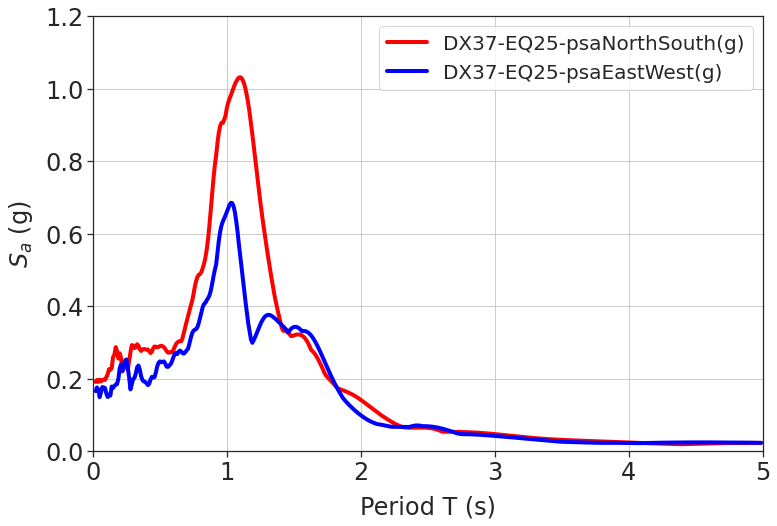

In [20]:
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

# Plot North-South component
ax.plot(df_CIRES_ZoneeII['Time(s)'], df_CIRES_ZoneeII['DX37-EQ25-psaNorthSouth(g)'], lw=4, c='red', label='DX37-EQ25-psaNorthSouth(g)')

# Plot East-West component
ax.plot(df_CIRES_ZoneeII['Time(s)'], df_CIRES_ZoneeII['DX37-EQ25-psaEastWest(g)'], lw=4, c='blue', label='DX37-EQ25-psaEastWest(g)')


# Add line for period and spectral accelaration
x_x=[1.512,1.512]
y_y=[0.0,0.24]

x_x2=[0,1.512]
y_y2=[0.240,0.240]

#ax.plot(x_x, y_y, lw=4, c='green')
#ax.plot(x_x2, y_y2, lw=4, c='green')

# Set axes limits
ax.set_xlim(0,5)
ax.set_ylim(0,1.2)

# Tick parameters
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)

# Axes titles
ax.set_xlabel('Period T (s)', fontsize = 24, labelpad=10)
ax.set_ylabel('$S_a$ (g)', fontsize = 24, labelpad=10)

# Grid lines
ax.grid(linewidth=1)

# Legend
ax.legend()
ax.legend(loc=1,prop={'size': 20})  #to make legend bold

plt.show()

In [48]:
# Export figure
#fig.savefig("/homevol/sroe459/git_projects/2017-Puebla-Mexico-earthquake/Figures/spectrum_CO56.png", dpi=150)

Try plotly express

In [30]:
import plotly.express as px

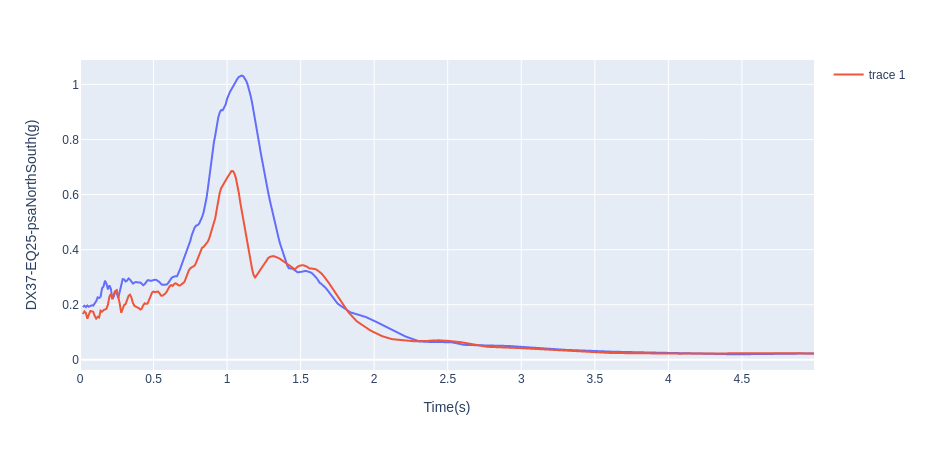

In [29]:
fig = px.line(df_CIRES_ZoneeII, x="Time(s)", y="DX37-EQ25-psaNorthSouth(g)")

fig.add_scatter(x=df_CIRES_ZoneeII['Time(s)'], y=df_CIRES_ZoneeII['DX37-EQ25-psaEastWest(g)'])

fig.show()